# Exploratory Data Analysis 
Resource:https://livebook.datascienceheroes.com/exploratory-data-analysis.html#profiling

## Table of Contents
1.1 [Profiling, The voice of the numbers](#Profiling,-The-voice-of-the-numbers)    
- 1.1.1 [Dataset health status](#Dataset-health-status)  
- 1.1.1.1 [Checking missing values, zeroes, data type, and unique values](#Checking-missing-values,-zeroes,-data-type,-and-unique-values)  
- 1.1.1.2 [Why are these metrics important?](#Why-are-these-metrics-important?)  
- 1.1.1.3 [Filtering unwanted cases](#Filtering-unwanted-cases)  
- 1.1.1.4 [Going deep into these topics](#Going-deep-into-these-topics)  
- 1.1.1.5 [Getting other common statistics: total rows, total columns and column names:](#Getting-other-common-statistics:-total-rows,-total-columns-and-column-names:)  

1.2 [Profiling categorical variables](#Profiling-categorical-variables)  

## Profiling, The voice of the numbers
- Back to [Table of Contents](#Table-of-Contents)  

 __“The voice of the numbers” – a metaphor by Eduardo Galeano. Writer and novelist.__

The data we explore could be like Egyptian hieroglyphs without a correct interpretation. Profiling is the very first step in a series of iterative stages in the pursuit of finding what the data want to tell us, if we are patient enough to listen.

This chapter will cover, with a few functions, a complete data profiling. This should be the entry step in a data project, where we start by knowing the correct data types and exploring distributions in numerical and categorical variables.

It also focuses on the extraction of semantic conclusions, which is useful when writing a report for non-technical people.

**What are we going to review in this chapter?**

- **Dataset health status:**
    - Getting metrics like total rows, columns, data types, zeros, and missing values  
    - How each of the previous items impacts on different analysis  
    - How to quickly filter and operate on (and with) them, to clean the data  
- **Univariate analysis in categorical variable:** 
    - Frequency, percentage, cumulative value, and colorful plots  
- **Univariate analysis with numerical variables:**  
    - Percentile, dispersion, standard deviation, mean, top and bottom values  
    - Percentile vs. quantile vs. quartile  
    - Kurtosis, skewness, inter-quartile range, variation coefficient  
    - Plotting distributions  
    - Complete case study based on “Data World”, data preparation, and data analysis  


Functions summary review in the chapter:

- `df_status(data)`: Profiling dataset structure
- `describe(data)`: Numerical and categorical profiling (quantitative)  
- `freq(data)`: Categorical profiling (quantitative and plot).  
- `profiling_num(data)`: Profiling for numerical variables (quantitative)  
- `plot_num(data)`: Profiling for numerical variables (plots)  

Note: `describe` is in the `Hmisc` package while remaining functions are in funModeling.

## Dataset health status
- Back to [Table of Contents](#Table-of-Contents)  
The quantity of zeros, NA, Inf, unique values as well as the data type may lead to a good or bad model. Here’s an approach to cover the very first step in data modeling.

First, we load the `funModeling` and `dplyr` libraries.

In [ ]:
# Loading funModeling!
library(funModeling)
library(dplyr)
data(heart_disease)

### Checking missing values, zeroes, data type, and unique values
- Back to [Table of Contents](#Table-of-Contents)  

Probably one of the first steps, when we get a new dataset to analyze, is to know if there are missing values (`NA` in **R**) and the data type.

The `df_status` function coming in `funModeling` can help us by showing these numbers in relative and percentage values. It also retrieves the infinite and zeros statistics.

In [2]:
# Profiling the data input
df_status(heart_disease)

                 variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1                     age       0    0.00    0 0.00     0     0 integer     41
2                  gender       0    0.00    0 0.00     0     0  factor      2
3              chest_pain       0    0.00    0 0.00     0     0  factor      4
4  resting_blood_pressure       0    0.00    0 0.00     0     0 integer     50
5       serum_cholestoral       0    0.00    0 0.00     0     0 integer    152
6     fasting_blood_sugar     258   85.15    0 0.00     0     0  factor      2
7         resting_electro     151   49.83    0 0.00     0     0  factor      3
8          max_heart_rate       0    0.00    0 0.00     0     0 integer     91
9             exer_angina     204   67.33    0 0.00     0     0 integer      2
10                oldpeak      99   32.67    0 0.00     0     0 numeric     40
11                  slope       0    0.00    0 0.00     0     0 integer      3
12      num_vessels_flour     176   58.09    4 1.32 

### Why are these metrics important?
- Back to [Table of Contents](#Table-of-Contents)  
  
- **Zeros**: Variables with **lots of zeros** may not be useful for modeling and, in some cases, they may dramatically bias the model.  
- **NA**: Several models automatically exclude rows with NA (**random forest** for example). As a result, the final model can be biased due to several missing rows because of only one variable. For example, if the data contains only one out of 100 variables with 90% of NAs, the model will be training with only 10% of the original rows.  
- **Inf**: Infinite values may lead to an unexpected behavior in some functions in R.  
- **Type**: Some variables are encoded as numbers, but they are codes or categories and the models **don’t handle them** in the same way.
- **Unique**: Factor/categorical variables with a high number of different values (~30) tend to do overfitting if the categories have low cardinality (**decision trees**, for example).

### Filtering unwanted cases
- Back to [Table of Contents](#Table-of-Contents)   

The function `df_status` takes a data frame and returns a *status table* that can help us quickly remove features (or variables) based on all the metrics described in the last section. For example:

**Removing variables with a *high number* of zeros**

In [3]:
# Profiling the Data Input
my_data_status=df_status(heart_disease, print_results = F)

# Removing variables with 60% of zero values
vars_to_remove=filter(my_data_status, p_zeros > 60)  %>% .$variable
vars_to_remove

[1] "fasting_blood_sugar" "exer_angina"         "exter_angina"

In [4]:
# Keeping all columns except the ones present in 'vars_to_remove' vector
heart_disease_2=select(heart_disease, -one_of(vars_to_remove))

#### Ordering data by percentage of zeros

In [5]:
arrange(my_data_status, -p_zeros) %>% select(variable, q_zeros, p_zeros)

variable,q_zeros,p_zeros
fasting_blood_sugar,258,85.15
exer_angina,204,67.33
exter_angina,204,67.33
num_vessels_flour,176,58.09
heart_disease_severity,164,54.13
resting_electro,151,49.83
oldpeak,99,32.67
age,0,0.00
gender,0,0.00
chest_pain,0,0.00


The same reasoning applies when we want to remove (or keep) those variables above or below a certain threshold. Please check the missing values chapter to get more information about the implications when dealing with variables containing missing values.

### Going deep into these topics
- Back to [Table of Contents](#Table-of-Contents)  

Values returned by `df_status` are deeply covered in other chapters:

- **Missing values** (NA) treatment, analysis, and imputation are deeply covered in the [Missing Data](https://livebook.datascienceheroes.com/data-preparation.html#missing_data) chapter.  
- **Data type**, its conversions and implications when handling different data types and more are covered in the [Data Types](https://livebook.datascienceheroes.com/data-preparation.html#data_types) chapter.  
- A high number of **unique values** is synonymous for high-cardinality variables. This situation is studied in both chapters:  
    - [High Cardinality Variable in Descriptive Stats](https://livebook.datascienceheroes.com/data-preparation.html#high_cardinality_descriptive_stats)
    - [High Cardinality Variable in Predictive Modeling](https://livebook.datascienceheroes.com/data-preparation.html#high_cardinality_predictive_modeling)

### Getting other common statistics: total rows, total columns and column names:
- Back to [Table of Contents](#Table-of-Contents) 

In [6]:
# Total rows
nrow(heart_disease)

[1] 303

In [7]:
# Total columns
ncol(heart_disease)

[1] 16

In [8]:
# Column names
colnames(heart_disease)

[1] "age"                    "gender"                 "chest_pain"            
 [4] "resting_blood_pressure" "serum_cholestoral"      "fasting_blood_sugar"   
 [7] "resting_electro"        "max_heart_rate"         "exer_angina"           
[10] "oldpeak"                "slope"                  "num_vessels_flour"     
[13] "thal"                   "heart_disease_severity" "exter_angina"          
[16] "has_heart_disease"

## Profiling categorical variables
- Back to [Table of Contents](#Table-of-Contents)  

*Make sure you have the latest ‘funModeling’ version (>= 1.6).*

Frequency or distribution analysis is made simple by the `freq` function. This retrieves the distribution in a table and a plot (by default) and shows the distribution of absolute and relative numbers.

If you want the distribution for two variables:

  thal frequency percentage cumulative_perc
1    3       166      54.79           54.79
2    7       117      38.61           93.40
3    6        18       5.94           99.34
4 <NA>         2       0.66          100.00



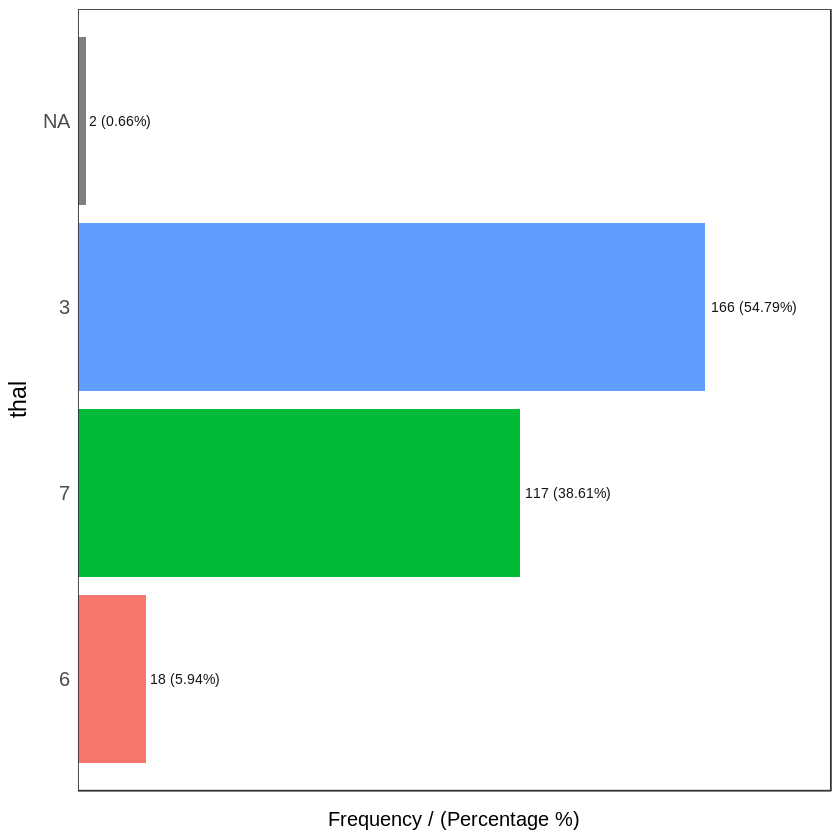

  chest_pain frequency percentage cumulative_perc
1          4       144      47.52           47.52
2          3        86      28.38           75.90
3          2        50      16.50           92.40
4          1        23       7.59          100.00



[1] "Variables processed: thal, chest_pain"

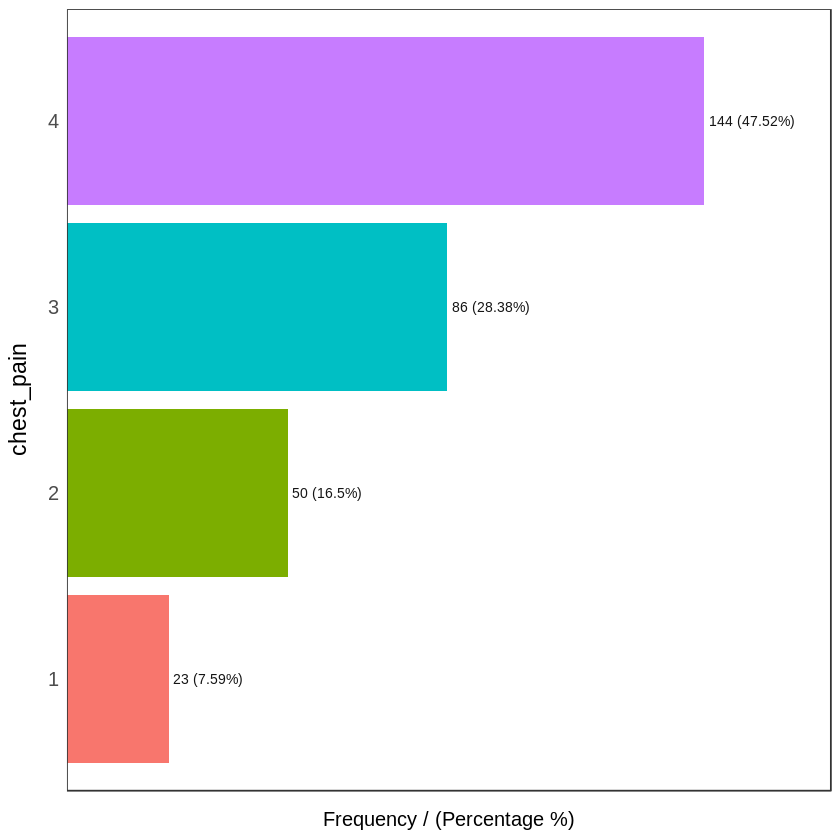

In [9]:
freq(data=heart_disease, input = c('thal','chest_pain'))

As well as in the remaining funModeling functions, if input is missing, then it will run for all factor or character variables present in a given data frame:

```R
freq(data=heart_disease)
```

If we only want to print the table excluding the `plot`, then we set the plot parameter to `FALSE`. The freq example can also handle a **single variable** as an input. By *default*, `NA` values **are considered** in both the table and the plot. If it is needed to exclude the `NA` then set `na.rm = FALSE`. Both examples in the following line:

```R
freq(data=heart_disease$thal, plot = FALSE, na.rm = FALSE)
```

If only one variable is provided, then `freq` returns the printed table; thus, it is easy to perform some calculations based on the variables it provides.

- For example, to print the categories that represent most of the 80% of the share (based on `cumulative_perc < 80`).  
- To get the categories belonging to the **long tail**, i.e., filtering by `percentage < 1` by retrieving those categories appearing less than 1% of the time.  

In addition, as with the other plot functions in the package, if there is a need to export plots, then add the path_out parameter, which will create the folder if it’s not yet created.

```R
freq(data=heart_disease, path_out='my_folder')
```